In [1]:
# Import required dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.gist_rainbow(np.linspace(0, 1, 25)))

# constants
FIGURE_SAVE_LOCATION = "../data/figures/04design/"
FIGURE_PREFILE = "assignment_"

In [2]:
assignment_df = pd.read_csv("../data/scratch/model_assignment.csv")

assignment_df.head(5)

,Island,Range,Prefill_TP,Prefill_DP,Prefill_Assignment,Prefill_Benchmark,Prefill_Assignment_Benchmark,Decode_TP,Decode_DP,Decode_Batch_Size,Decode_Assignment,Decode_Benchmark,Decode_Assignment_Benchmark,Mode
0,DGX-B300_0,0,1.0,18.0,0.000000,102.280731,0.000000,6.0,6.0,168.0,0.0,212.913536,0.0,0.0
1,DGX-B300_0,1,1.0,18.0,0.000000,76.865117,0.000000,6.0,6.0,152.0,0.0,197.219575,0.0,0.0
2,DGX-B300_0,2,1.0,18.0,0.000000,61.555925,0.000000,6.0,6.0,144.0,0.0,188.927820,0.0,0.0
3,DGX-B300_0,3,1.0,18.0,0.000000,51.324757,0.000000,6.0,6.0,128.0,0.0,172.216445,0.0,0.0
4,DGX-B300_0,4,1.0,18.0,0.095901,44.004485,4.220055,6.0,6.0,120.0,0.0,163.421289,0.0,0.0


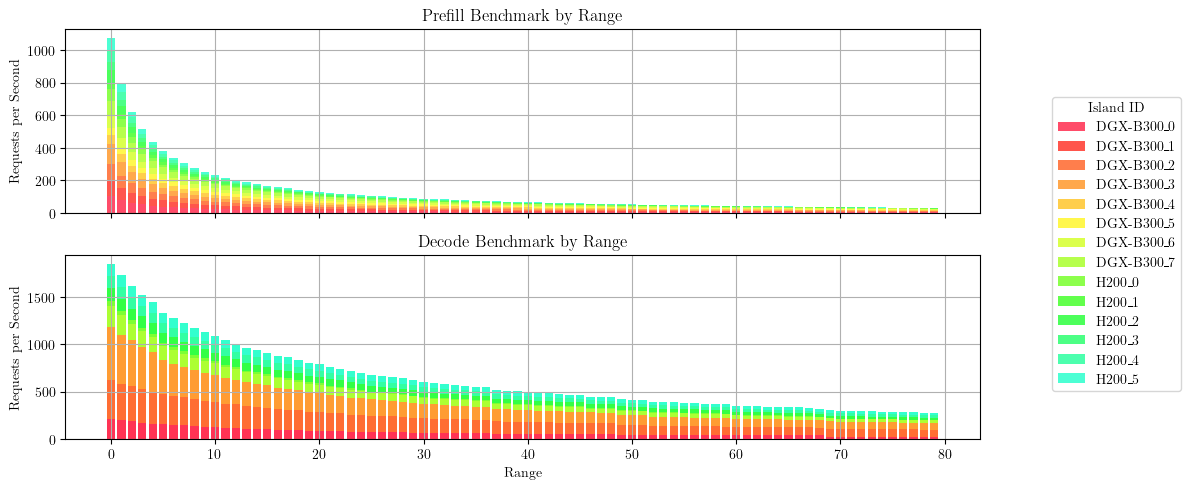

In [3]:
# plot the prefill and decode benchmarks by range and island
prefill_df = assignment_df.pivot_table(index='Range', columns='Island', values='Prefill_Benchmark', aggfunc='sum', fill_value=0)
decode_df = assignment_df.pivot_table(index='Range', columns='Island', values='Decode_Benchmark', aggfunc='sum', fill_value=0)

# Plot
x = prefill_df.index
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

# 1) Prefill on the top subplot
bottom = None
for isl in prefill_df.columns:
    axes[0].bar(x, prefill_df[isl], bottom=bottom, label=isl, alpha=0.7)
    bottom = prefill_df[isl] if bottom is None else bottom + prefill_df[isl]
axes[0].set_title("Prefill Benchmark by Range")
axes[0].set_ylabel("Requests per Second")
axes[0].grid(True)

# 2) Decode on the bottom subplot
bottom = None
for isl in decode_df.columns:
    axes[1].bar(x, decode_df[isl], bottom=bottom, label=isl, alpha=0.8)
    bottom = decode_df[isl] if bottom is None else bottom + decode_df[isl]
axes[1].set_title("Decode Benchmark by Range")
axes[1].set_xlabel("Range")
axes[1].set_ylabel("Requests per Second")
axes[1].grid(True)

# grab handles & labels from one of the subplots
handles, labels = axes[0].get_legend_handles_labels()

# add a single legend to the figure
fig.legend(handles,
           labels,
           title="Island ID",
           bbox_to_anchor=(1.05, 0.5),
           loc="center left")

plt.tight_layout()
plt.savefig(FIGURE_SAVE_LOCATION + FIGURE_PREFILE + "sample_benchmark.pdf", bbox_inches='tight')

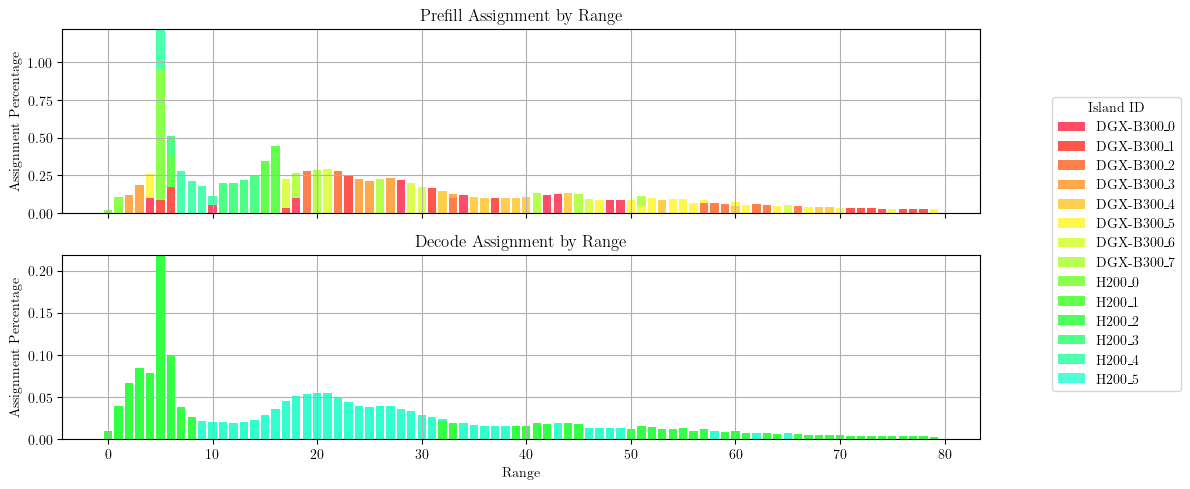

In [4]:
# plot the prefill and decode assignment by range and island
prefill_df = assignment_df.pivot_table(index='Range', columns='Island', values='Prefill_Assignment', aggfunc='sum', fill_value=0)
decode_df = assignment_df.pivot_table(index='Range', columns='Island', values='Decode_Assignment', aggfunc='sum', fill_value=0)

# Plot
x = prefill_df.index
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

# 1) Prefill on the top subplot
bottom = None
for isl in prefill_df.columns:
    axes[0].bar(x, prefill_df[isl], bottom=bottom, label=isl, alpha=0.7)
    bottom = prefill_df[isl] if bottom is None else bottom + prefill_df[isl]
axes[0].set_title("Prefill Assignment by Range")
axes[0].set_ylabel("Assignment Percentage")
axes[0].grid(True)

# 2) Decode on the bottom subplot
bottom = None
for isl in decode_df.columns:
    axes[1].bar(x, decode_df[isl], bottom=bottom, label=isl, alpha=0.8)
    bottom = decode_df[isl] if bottom is None else bottom + decode_df[isl]
axes[1].set_title("Decode Assignment by Range")
axes[1].set_xlabel("Range")
axes[1].set_ylabel("Assignment Percentage")
axes[1].grid(True)

# grab handles & labels from one of the subplots
handles, labels = axes[0].get_legend_handles_labels()

# add a single legend to the figure
fig.legend(handles,
           labels,
           title="Island ID",
           bbox_to_anchor=(1.05, 0.5),
           loc="center left")

plt.tight_layout()
plt.savefig(FIGURE_SAVE_LOCATION + FIGURE_PREFILE + "sample_assignment.pdf", bbox_inches='tight')


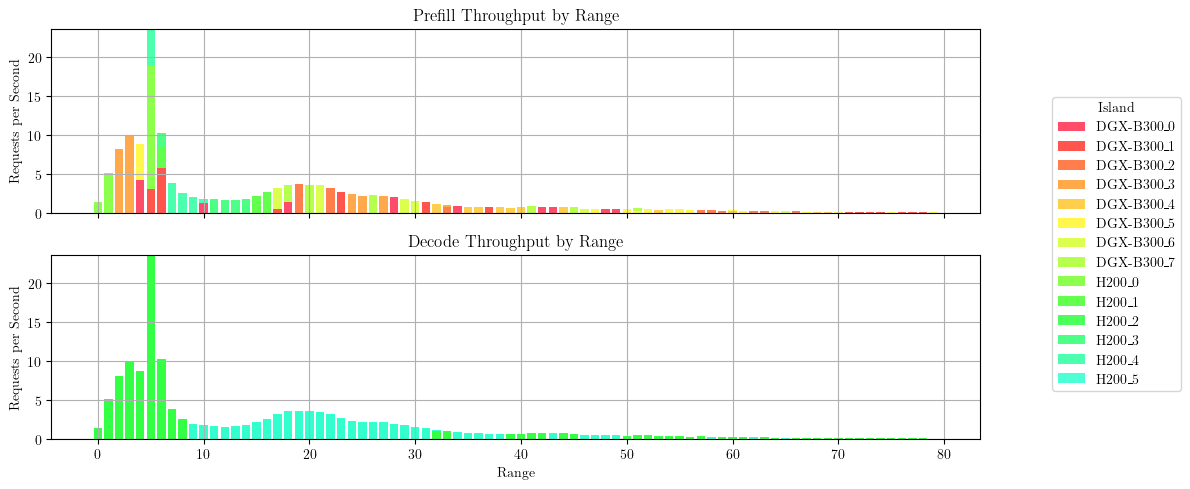

In [5]:
# plot the prefill and decode assignment by range and island
prefill_df = assignment_df.pivot_table(index='Range', columns='Island', values='Prefill_Assignment_Benchmark', aggfunc='sum', fill_value=0)
decode_df = assignment_df.pivot_table(index='Range', columns='Island', values='Decode_Assignment_Benchmark', aggfunc='sum', fill_value=0)

# Plot
x = prefill_df.index
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

# 1) Prefill on the top subplot
bottom = None
for isl in prefill_df.columns:
    axes[0].bar(x, prefill_df[isl], bottom=bottom, label=isl, alpha=0.7)
    bottom = prefill_df[isl] if bottom is None else bottom + prefill_df[isl]
axes[0].set_title("Prefill Throughput by Range")
axes[0].set_ylabel("Requests per Second")
axes[0].grid(True)

# 2) Decode on the bottom subplot
bottom = None
for isl in decode_df.columns:
    axes[1].bar(x, decode_df[isl], bottom=bottom, label=isl, alpha=0.8)
    bottom = decode_df[isl] if bottom is None else bottom + decode_df[isl]
axes[1].set_title("Decode Throughput by Range")
axes[1].set_xlabel("Range")
axes[1].set_ylabel("Requests per Second")
axes[1].grid(True)

# grab handles & labels from one of the subplots
handles, labels = axes[0].get_legend_handles_labels()

# add a single legend to the figure
fig.legend(handles,
           labels,
           title="Island",
           bbox_to_anchor=(1.05, 0.5),
           loc="center left")

plt.tight_layout()
plt.savefig(FIGURE_SAVE_LOCATION + FIGURE_PREFILE + "sample_assignment_benchmark.pdf", bbox_inches='tight')


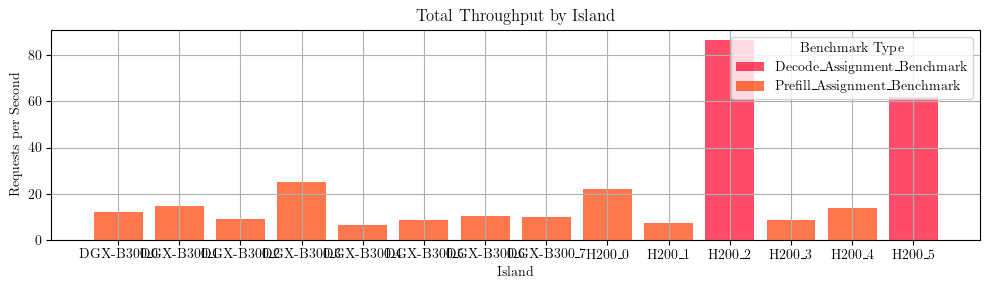

In [6]:
# sum Decode_Assignment_Benchmark and Prefill_Assignment_Benchmark for each island and plot the results (bar per island)
total_df = assignment_df.groupby('Island').agg({
    'Decode_Assignment_Benchmark': 'sum',
    'Prefill_Assignment_Benchmark': 'sum'
}).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 3))
colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(total_df)))

# Plot each column with matching colors
for i, col in enumerate(['Decode_Assignment_Benchmark', 'Prefill_Assignment_Benchmark']):
    ax.bar(total_df['Island'], total_df[col], label=col, color=colors[i], alpha=0.7)

ax.set_title("Total Throughput by Island")
ax.set_ylabel("Requests per Second")
ax.set_xlabel("Island")
ax.grid(True)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Benchmark Type", loc='upper right')

plt.tight_layout()
plt.show()

In [7]:
# print the total throughput of the entire system
total_prefill = total_df['Prefill_Assignment_Benchmark'].sum()
total_decode = total_df['Decode_Assignment_Benchmark'].sum()

print(f"Total Prefill Throughput: {total_prefill} requests per second")
print(f"Total Decode Throughput: {total_decode} requests per second")

Total Prefill Throughput: 148.42718222275295 requests per second
Total Decode Throughput: 148.42718225936989 requests per second
